Im Folgenden untersuchen wir kurz Korrelationen der Sozialindikatoren aus der Sozialstrukturanalyse. In der vorliegenden Exceldatei haben wir dafür für das Jahr 2022 Anzahlen und Prozentanteile für Stadtteile Münsters zusammengefasst, bezogen auf verschiedene Sozialindikatoren.

In [8]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/SabGe90/techlabs24/928271751c34b16dc90aea1a2fe42dc9fa5b3743/Dateien/Datensatz_Techlabs.csv", encoding="utf-8", sep=";")
df.head()

# df.groupby(["Stadtteil"])["Arbeitslosenquote"].sum().sort_values(ascending=False)

df.dtypes

# Kommata in Punkte umwandeln und Datentypkonvertierungen in float
df["Bevölkerungszahl-Stadtteil"]=df["Bevölkerungszahl-Stadtteil"].replace(',', '.').astype(float)
df['Ausländeranteil']=df['Ausländeranteil'].str.replace(',', '.').astype(float)
df['Bevölkerungsdichte-Stadtteil (pro Hektar)']=df['Bevölkerungsdichte-Stadtteil (pro Hektar)'].str.replace(',', '.')#.astype(float)

df['Arbeitslosenquote']=df['Arbeitslosenquote'].str.replace(',', '.').astype(float)
df['Anteil SGB-II-Empfänger']=df['Anteil SGB-II-Empfänger'].str.replace(',', '.').astype(float)
df['Migrationsanteil']=df['Migrationsanteil'].str.replace(',', '.').astype(float)

df['Durchschnittl. Einwohnerzahl je Adresse']=df['Durchschnittl. Einwohnerzahl je Adresse'].str.replace(',', '.').astype(float)

df['Durchschnittl. Haushaltsgröße']=df['Durchschnittl. Haushaltsgröße'].str.replace(',', '.').astype(float)


In [9]:
df.head()

,Stadtbezirk,Stadtteil,Bevölkerungszahl-Stadtteil,Bevölkerungsdichte-Stadtteil (pro Hektar),Arbeitslosenquote,Anteil SGB-II-Empfänger,Migrationsanteil,Ausländeranteil,Durchschnittl. Einwohnerzahl je Adresse,Durschnittl. Wahlbeteiligung Europawahl-Stadtbezirk,Durchschnittl. Haushaltsgröße
0,Nord,Coerde,11177.0,19.05,8.55,18.68,53.55,28.98,7.69,"61,37",2.16
1,Nord,Kinderhaus-Ost,5374.0,20.5,4.88,10.26,28.73,14.42,5.05,"61,37",1.86
2,Nord,Kinderhaus-West,10767.0,20.86,7.46,14.04,42.82,21.20,6.01,"61,37",2.01
3,Nord,Sprakel,3680.0,1.64,2.34,3.88,25.68,7.20,3.46,"61,37",2.28
4,Ost,Gelmer,4063.0,2.29,3.91,5.66,22.63,12.95,3.52,NaN,2.14


In [10]:
df.describe()

,Bevölkerungszahl-Stadtteil,Arbeitslosenquote,Anteil SGB-II-Empfänger,Migrationsanteil,Ausländeranteil,Durchschnittl. Einwohnerzahl je Adresse,Durchschnittl. Haushaltsgröße
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,8461.300000,4.498000,8.056500,29.11900,14.027500,4.705500,2.066500
std,3884.758302,1.813199,4.225271,9.83244,6.527767,1.299682,0.140947
min,3680.000000,2.340000,3.750000,17.21000,5.520000,3.270000,1.780000
25%,6132.000000,3.257500,5.547500,22.88500,9.525000,3.730000,2.005000
50%,7601.500000,3.780000,6.320000,26.17000,12.185000,4.275000,2.045000
75%,10349.000000,4.982500,9.390000,31.51250,15.677500,5.190000,2.160000
max,21768.000000,8.550000,18.680000,53.55000,28.980000,7.690000,2.310000


Wir vergleichen die Merkmale per Pairplot:


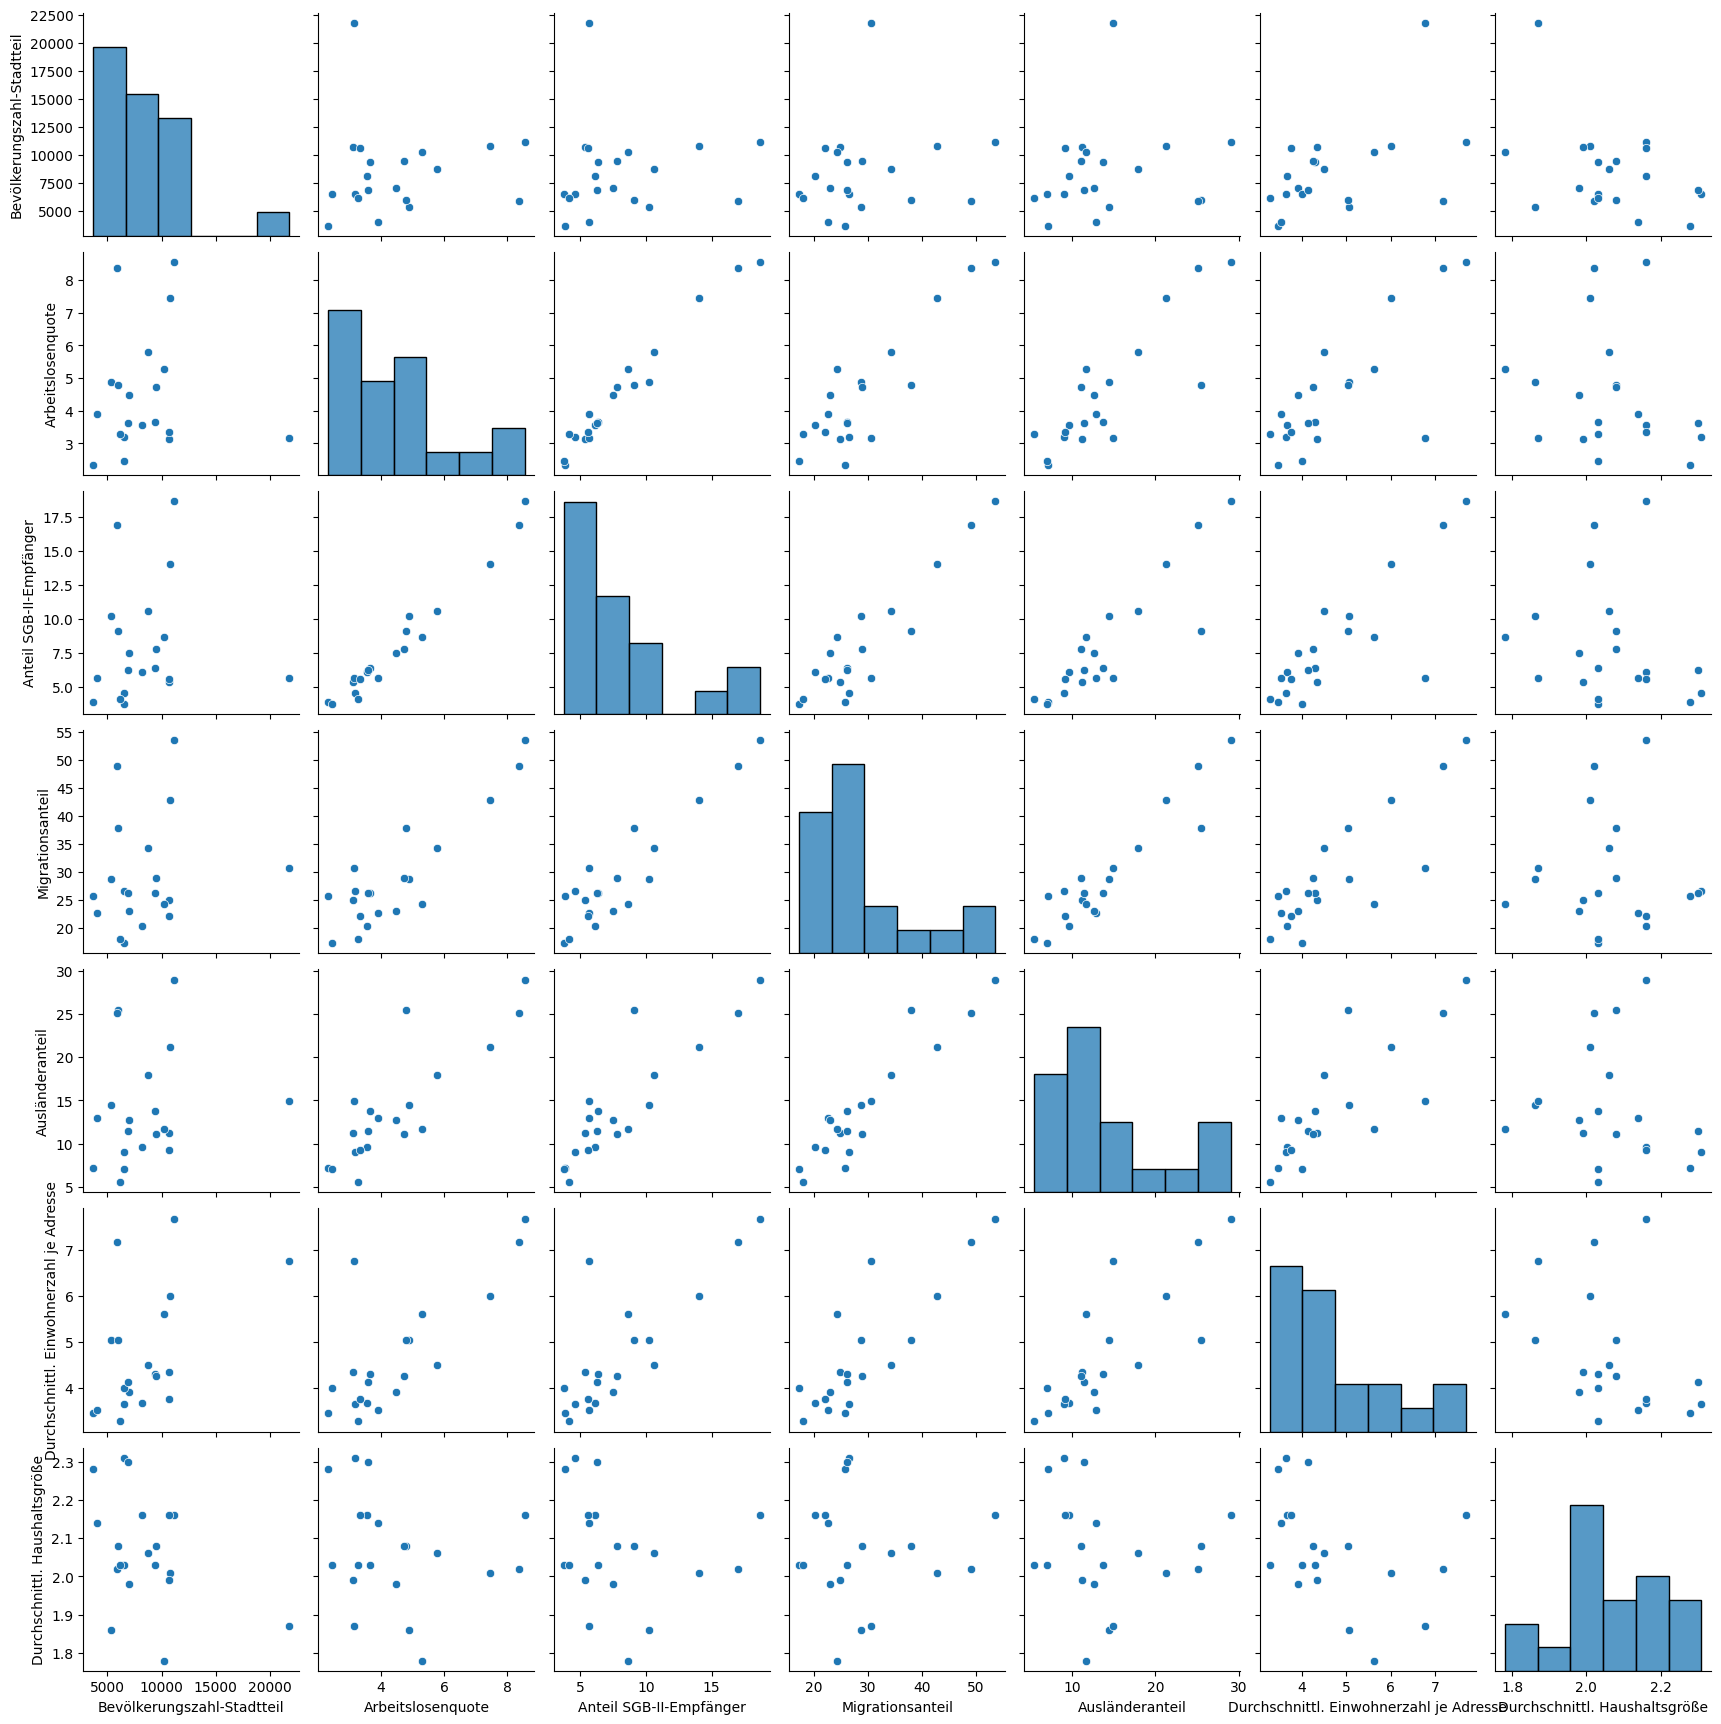

In [11]:
import seaborn
import matplotlib.pyplot as plt

print("Wir vergleichen die Merkmale per Pairplot:")
seaborn.pairplot(df)
plt.show()

Da wo die Punkte enger beieinander liegen (zB Arbeitslosenquote+ Anteil SGB II-Empfänger), besteht tendentiell ein höherer Zusammenhang. Der Korrelationskoeffizient ist dort dann näher an 1 oder -1.

**Hinweis:** Pairplots und Korrelationskoeffizienten sind hier kein beleg für tatsächliche Zusammenhänge, sondern sind nur Indikator ob Merkmale im Zusammenhang miteinander stehen können!

<br>

Als nächstes gibt es obigen Pairplot auch noch mal in Zahlen als Korrelationskeffizient (Zahl zwischen -1 und 1).

In [12]:
#df[~df["Stadtbezirk"]].corr()
#df[df.columns[~df.columns.isin(["Stadtbezirk","Stadtteil"])]].corr()

In [13]:
print("Berechnung eines einzelnen Korrelationskoeffizienten aus der Tabelle:")
df['Arbeitslosenquote'].corr(df['Ausländeranteil'])

Berechnung eines einzelnen Korrelationskoeffizienten aus der Tabelle:


0.8539901110635398

Wir sehen dass Arbeitslosenquote und Ausländeranteil tendenziell im Zusammenhang stehen könnten.